**Examples**

Adding Milk

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')

Downloaded modsim.py


In [2]:
from modsim import *

In [3]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'chap15.py')

Downloaded chap15.py


In [4]:
from chap15 import change_func
from chap15 import run_simulation
from chap15 import make_system

Mixing Liquids

In [5]:
def mix(system1, system2):

    vol1, vol2 = system1.volume, system2.volume
    temp1, temp2 = system1.T_final, system2.T_final

    V_mix = vol1 + vol2
    T_mix = (vol1 * temp1 + vol2 * temp2) / V_mix

    return make_system(T_init=T_mix,
                       volume=V_mix,
                       r=system1.r,
                       t_end=25)

Mix First or Last?

In [6]:
r_coffee = 0.0120
coffee = make_system(T_init=95, volume=350, r=r_coffee, t_end=25)
r_milk = 0.135
milk = make_system(T_init=3, volume=60, r=r_milk, t_end=17)
mix_first = mix(coffee, milk)
run_simulation(mix_first, change_func)
mix_first.T_final

66.02582849004139

In [7]:
run_simulation(coffee, change_func)
run_simulation(milk, change_func)
mix_last = mix(coffee, milk)
mix_last.T_final

67.84566775686048

Optimal Timing

In [8]:
def run_and_mix(t_add, t_total):
    coffee.t_end = t_add
    coffee_results = run_simulation(coffee, change_func)

    milk.t_end = t_add
    milk_results = run_simulation(milk, change_func)

    mixture = mix(coffee, milk)
    mixture.t_end = t_total - t_add
    results = run_simulation(mixture, change_func)

    return mixture.T_final

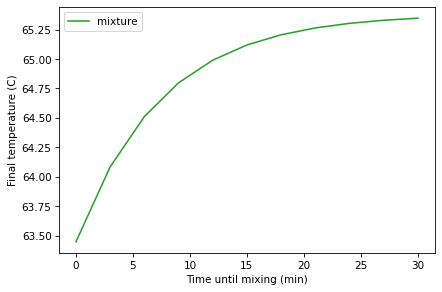

In [9]:
sweep = SweepSeries()
for t_add in linspace(0, 30, 11):
    sweep[t_add] = run_and_mix(t_add, 30)
sweep.plot(label='mixture', color='C2')
decorate(xlabel='Time until mixing (min)',
         ylabel='Final temperature (C)')

Analytic Solution

In [10]:
from numpy import log

def compute_r(system):
    t_end = system.t_end
    T_init = system.T_init
    T_final = system.T_final
    T_env = system.T_env

    r = log((T_init - T_env) / (T_final - T_env)) / t_end
    return r

In [11]:
coffee2 = make_system(T_init=90, volume=300, r=0, t_end=30)
coffee2.T_final = 70
r_coffee2 = compute_r(coffee2)
r_coffee2

0.01161022314227386

In [12]:
from numpy import exp

def run_analysis(system):
    T_env, T_init, r = system.T_env, system.T_init, system.r

    t_array = linrange(system.t_0, system.t_end, system.dt)
    T_array = T_env + (T_init - T_env) * exp(-r * t_array)

    system.T_final = T_array[-1]
    return make_series(t_array, T_array)

In [13]:
coffee2.r = r_coffee2
results2 = run_analysis(coffee2)
coffee2.T_final

70.0

In [14]:
coffee.r = 0.011543
results = run_simulation(coffee, change_func)

from numpy import allclose

allclose(results, results2)

False

**Exercises**

Exercise 1

In [17]:
second_milk_sys = make_system(T_init=4, volume=70, r=0, t_end=20)
second_milk_sys.T_final = 20
r_second_milk_sys = compute_r(second_milk_sys)
r_second_milk_sys
second_milk_sys = make_system(T_init=4, volume=70, r=r_second_milk_sys, t_end=20)
results2 = run_analysis(second_milk_sys)
second_milk_sys.T_final
milk = make_system(T_init=4, volume=70, r=0.13296, t_end=20)
results = run_simulation(milk, change_func)
from numpy import allclose
allclose(results, results2)

False

Exercise 2

In [18]:
#Refrigerator keeps the milk at a constant temperature, a container with r = 0.
#T_init=4 and r_milk = 0, best to add milk at the coffee shop.